<a 
    target="_blank" 
    href="https://colab.research.google.com/github/davidgasquez/gitcoin-grants-data-portal/blob/main/notebooks/sandbox.ipynb"> 
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

First, we need to get the latest IPFS CID of the content. The hash is [stored in a GitHub file](https://raw.githubusercontent.com/davidgasquez/gitcoin-grants-data-portal/main/data/IPFS_CID) while support for IPNS or ENS is added.

In [1]:
import requests

LATEST_IPFS_CID = requests.get(
    "https://raw.githubusercontent.com/davidgasquez/gitcoin-grants-data-portal/main/data/IPFS_CID"
).text.strip()

GATEWAY_URL = f"https://ipfs.filebase.io/ipfs/{LATEST_IPFS_CID}/"

Once you have the latest URL, you can remotely access the data from your favorite data science tools like pandas, polars, DuckDB.

For example, let's see the number of votes per round.

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

<Axes: title={'center': 'Top 10 Rounds by Votes'}, xlabel='round_id'>

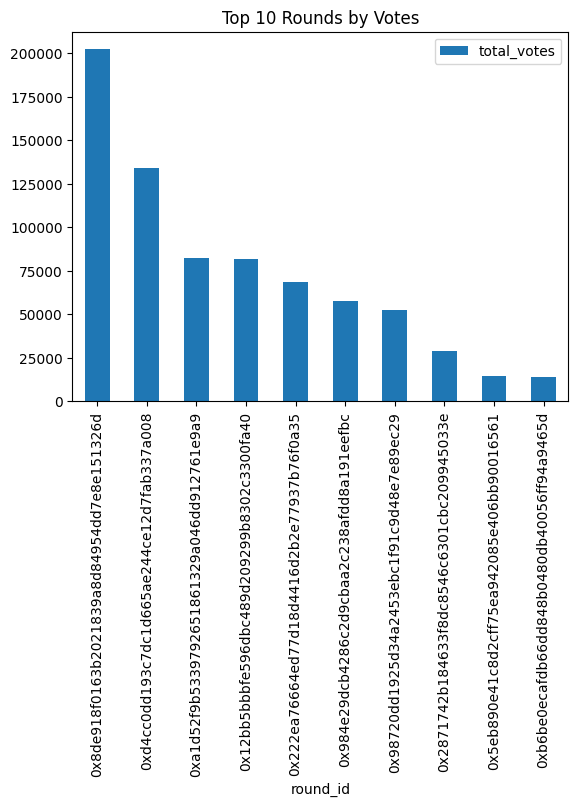

In [10]:
import duckdb

duckdb.sql(
    f"""
    select
        round_id,
        count(distinct id) as total_votes
    from '{GATEWAY_URL}/round_votes.parquet'
    group by round_id
    order by 2 desc
    limit 10;
    """
).df().plot.bar(x="round_id", y="total_votes", title="Top 10 Rounds by Votes")

We can see for example the top contributors for chain `1`.

In [19]:
duckdb.sql(
    f"""
    select
        voter,
        sum(amount_usd)
    from '{GATEWAY_URL}/round_votes.parquet'
    where chain_id = 1
    group by 1
    order by 2 desc
    limit 10
    """
).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,voter,sum(amount_usd)
0,0x8a205728f464b0755f72780df1763d1e1f0f5ba5,8087.002244
1,0xbd4eb0295468c80725017f74113f5aebbd6e8d12,6810.616077
2,0x839395e20bbb182fa440d08f850e6c7a8f6f0780,5887.459406
3,0xd88d5b3dbe8790369799012310c31eb210eeec81,5079.673008
4,0x0fc338d0a925fa564171d1d7c0ffdb271ad19d49,4723.094377
5,0x471e96a01962b62fe3e9e8e367f6be56e3e983d0,4596.338842
6,0xc6d7522f7b012b22bc365c9c43b3dbf13b9aaff9,3420.906163
7,0xb13b2db51ca77ea06b1d3e83f2615006e9a4bdad,3199.346490
8,0xd21d931890d27b6e7e2e668f27931e17698e90f1,3194.710788
9,0xfc66a1f969bb77eb89a314725d657312d58f1589,2504.862395


#### Passport Scores

In [11]:
duckdb.sql(
    f"from '{GATEWAY_URL}/passport_scores.parquet' order by last_score_timestamp desc limit 10"
).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,address,score,status,last_score_timestamp,evidence_type,evidence_success,evidence_raw_score,evidence_threshold
0,0x34b111ee7738604d034687e71df51bf2e5bcec1a,0,DONE,2023-12-22 14:01:39.758000+00:00,ThresholdScoreCheck,false,13.148,20.00000
1,0x9454b00a48d4b694c37539fb7db4565db19e71f5,0,DONE,2023-12-22 14:01:34.449000+00:00,ThresholdScoreCheck,false,14.459,20.00000
2,0xbf0254783ee69b06522616bb8ba63601eb0de9cf,0,DONE,2023-12-22 14:01:32.531000+00:00,ThresholdScoreCheck,false,9.13,20.00000
3,0x988b23cb7612b606ed17e175d99b03b607478a95,1,DONE,2023-12-22 14:01:30.785000+00:00,ThresholdScoreCheck,true,26.5765,20.00000
4,0x5951c0fc9fceb93b4726775b89af68650c405b4a,0,DONE,2023-12-22 14:01:23.630000+00:00,ThresholdScoreCheck,false,3.830,20.00000
5,0xce6e190defd8c40280006bd3ea9cc997fc4ccdf0,0,DONE,2023-12-22 14:01:20.419000+00:00,ThresholdScoreCheck,false,15.335,20.00000
6,0xa4e4b2106d6691a261334518bb28c683be255a90,0,DONE,2023-12-22 14:01:13.804000+00:00,ThresholdScoreCheck,false,9.788,20.00000
7,0x9aad207b77e2c54727597b330df0dc83a6f88b11,0,DONE,2023-12-22 14:01:09.304000+00:00,ThresholdScoreCheck,false,13.7575,20.00000
8,0x12657fe1e5ec50eed73e8933e5b59df161eb1427,0,DONE,2023-12-22 14:00:56.378000+00:00,ThresholdScoreCheck,false,17.499,20.00000
9,0x1401e424be71fcb7a019b1703ad7b43ddf1a3821,0,DONE,2023-12-22 14:00:52.649000+00:00,ThresholdScoreCheck,false,13.279,20.00000


### Projects

In [14]:
duckdb.sql(
    f"from '{GATEWAY_URL}/projects.parquet' order by created_at desc limit 5"
).df()

,project_id,project_number,meta_ptr,metadata,owners,created_at_block,chain_id,title,description,website,project_twitter,logo_image,banner_image,created_at
0,0x4475c3a32069a282ba501e1a1bfe526b234f19f7e9a5...,1719,bafkreibe4iv7yyxozkyfwj6tllypgee5d777zolt7u2li...,"{""title"": ""Keep it Crypto"", ""description"": ""Ke...",[0x3034BA2edD90CC4739acbdBaD8DF8e1B63e9495E],113829217,10,Keep it Crypto,Keep It Crypto is the brainchild of Cami Darin...,https://keepitcrypto.squarespace.com/,keepitcrypto_,bafkreigrmib2eqa6wtpvb7ac4f57ibn24zkinehqbudqw...,bafkreibqwa2lnwa64rd2kilikyslzvbuxpqwldyha2gap...,1.703257e+12
1,0x091b0831aba8670ce56a17a9bb3bc46615d39c780b1b...,1718,bafkreig4onpjqdr2fqqfvn2leehpwrigxatarwxyekxp6...,"{""title"": ""Keep it Crypto"", ""description"": ""Ke...",[0x3034BA2edD90CC4739acbdBaD8DF8e1B63e9495E],113829213,10,Keep it Crypto,Keep It Crypto is the brainchild of Cami Darin...,https://keepitcrypto.squarespace.com/,keepitcrypto_,bafkreigrmib2eqa6wtpvb7ac4f57ibn24zkinehqbudqw...,bafkreibqwa2lnwa64rd2kilikyslzvbuxpqwldyha2gap...,1.703257e+12
2,0x7bc35a183db171b6e5775dd979661d682daa2adf2a32...,171,bafkreifvihbthmxep2wun53cnsh4t7gw6uaymzgi2yep4...,"{""title"": ""Future Relief"", ""description"": ""\""S...",[0xc84BF495a639240cf55740B593Bc7CF9012d8a2D],51418040,137,Future Relief,"""Stake your crypto, donate the earnings, and g...",https://futurerelief.xyz,None,bafkreifdijpww52sdrjtfq5p6ejyhkz6ig7uhw7amnata...,bafkreihu5jhny3nokshz2ih27uxq7qxjyrlas6yjpzuvr...,1.703240e+12
3,0xe3f7d6b20ea5aa8db90d240c2f29fcee381e8b362ea1...,411,bafkreig7tki5mhh73uoyh6anztanethyyhhcbcp2gfjuv...,"{""title"": ""ACryptoS"", ""description"": ""ACryptoS...",[0xCcCCbE5B70E7Ba9dE405C480f9f8Cd6bA835aDEC],162530590,42161,ACryptoS,"ACryptoS, established in 2020, is a pioneering...",https://app.acryptos.com,acryptosdao,bafkreid3ygvqifq5yzepi6hy64zgv2iwkqo5pae6tyb4d...,bafkreiaeuhfcxwearfkb4hwty2v2lrvu5xztgd2y73y3b...,1.703234e+12
4,0x30bf9b4f537054ecd775c64efc506b7f9fd72c4e1a43...,410,bafkreifzeixzzu2wd5ergz7bxm5yk4fjtp7myqwheetbb...,"{""title"": ""TxStreets"", ""description"": ""# TxStr...",[0x6B023CBe06392E7A956C17373d6106e135427071],162342183,42161,TxStreets,# TxStreets: Interactive Blockchain Transactio...,https://txstreets.com,txstreetsCom,bafkreidtbah4lofswniqbxn5usttouolfktb4oirhw4og...,bafkreicsiwr45n4glcsgnzzvqqujo3flybxw7x5ii6aye...,1.703186e+12


### Rounds

In [17]:
duckdb.sql(
    f"from '{GATEWAY_URL}/rounds.parquet' order by created_at_block desc limit 10"
).df()

,id,amount_usd,votes,token,match_amount,match_amount_usd,unique_contributors,application_meta_ptr,application_metadata,meta_ptr,...,applications_end_time,round_start_time,round_end_time,created_at_block,updated_at_block,chain_id,name,round_type,program_address,sybil_defense
0,0xe0a6f4E932b16C85318A77de43B7048863C522D2,17.723946,3,0x912ce59144191c1204e64559fe8253a0e49e6548,1.000000e+20,107.158592,1,bafkreia2qz6iwittp5jg5q44i6zvedgccfnlumn6vs6uf...,"{'lastUpdatedOn': 1701883086748, 'applicationS...",bafkreihaa3ec73fsujtba4xf6svwc6cyef2xjjl2weafv...,...,1.702166e+09,1701993540,1.702166e+09,157497847,157497847,42161,GPT Internal Round,private,0xd6d47d4f0b2384ab2df470c6a16e3fd241b8fb2b,False
1,0xc283Bc8656C3D4Ca1fAd0e41214F36C9Ca370603,0.000000,0,0x912ce59144191c1204e64559fe8253a0e49e6548,1.000000e+20,109.056016,0,bafkreibk3lzkasdvzsuinbotaimkwv6nhxee2zp2amrf5...,"{'lastUpdatedOn': 1701541787075, 'applicationS...",bafkreic2z4h33bicge6afddigf3fivulb2aoaosui7fnq...,...,1.701724e+09,1701561600,1.701724e+09,156241985,156241985,42161,GPT Round Internal,private,0xe71d74a696fd8b80a5aa770dd582fb52ec17f9a9,False
2,0x302Dbc8eB3bf73565A1205648B61b23CB3f72Ff7,8796.982192,2971,0x912ce59144191c1204e64559fe8253a0e49e6548,7.500000e+22,74864.222250,1058,bafkreibq4qfldppjpmcwmdgj6e2cz6weqihwyzqd4gu5g...,"{'lastUpdatedOn': 1701102231738, 'applicationS...",bafkreia3okgfhb4367ro6qawohqqqi4zbydd44ybsshow...,...,1.702426e+09,1701129600,1.702426e+09,154645606,154645606,42161,American Cancer Society,public,0xc869181c8ad1d3689a9ccaa1321eb106f518895a,False
3,0xAdB87C22964FB8d79c294162b3c0A3b03c505eBf,0.000000,0,0xaf88d065e77c8cc2239327c5edb3a432268e5831,5.000000e+08,499.981425,0,bafkreideewpkktzagxbcpljwl7xlnpjs5ctta2lo33pzs...,"{'lastUpdatedOn': 1701098056494, 'applicationS...",bafkreigspqpzoo4bhdvgfyub4zt2ayzmfiy2mppxm5lgf...,...,1.703290e+09,1702252800,1.703290e+09,154629810,154629810,42161,LunCo Alpha QF,public,0x263e7a6b847cd432ee9d6f20cc843672ce046e03,False
4,0xAdD7212a6ef2985484b08a5c227721A57A1F50bc,0.000000,0,0x0000000000000000000000000000000000000000,3.700000e+19,74620.795709,0,bafkreidjtodp7owb5b6ta2gzdjn7gn3bn4lo47tbb3dd6...,"{'lastUpdatedOn': 1701097316391, 'applicationS...",bafkreih4ppi3wtqfhhlsfyxrgfabhdtuljokn7igrt552...,...,1.702426e+09,1701129600,1.702426e+09,154626834,154626834,42161,American Cancer Society,private,0x4d272ea21f84db89424fc81c49040cc583853bdc,False
5,0x822742805C0596e883abA99BA2f3117E8c49b94A,0.000000,0,0x0000000000000000000000000000000000000000,7.530000e+19,159631.419511,0,bafkreia7ri3lvr7rt2cxwns2t5m2ckq2bjjw47lcin7ol...,"{'lastUpdatedOn': 1700842457598, 'applicationS...",bafkreif5ngqx6qporajw2uiqlpysqbdzogkllg6pn2gra...,...,1.702339e+09,1701086400,1.702339e+09,153655116,153655116,42161,American Cancer Society,public,0xb7b66431d214ff01d0c3cb64e3c66d29c4b5c938,False
6,0xE378C217EC2404dE0ABE52EdF28e58B788A1b113,0.000000,0,0x0000000000000000000000000000000000000000,0.000000e+00,0.000000,0,bafkreico4xgx233rzrqqmhcwa73vejclj2ethlui725fb...,"{'lastUpdatedOn': 1700835549100, 'applicationS...",bafkreiezs6ndr2mml7nsdkfkiv3zrkg6iwaeav5bizcom...,...,1.157921e+77,1701388800,1.157921e+77,153628011,153628011,42161,Microgrants,public,0x71e4419cda0705ab913d0c17818a6a24564a6bdd,NaN
7,0x670b52DA86e2132eca2F2029fA36c724aAE4a16e,0.000000,0,0x0000000000000000000000000000000000000000,0.000000e+00,0.000000,0,bafkreidgghtkyyjeemh47rcqoskaspu7gortvq57w6hyp...,"{'lastUpdatedOn': 1700832116919, 'applicationS...",bafkreicbnwdssvo7ivaig7iml7vhpumd6nejo2bg6kth5...,...,1.157921e+77,1700870400,1.157921e+77,153614761,153614761,42161,Sov's Direct Grants Extravaganza,private,0xc413d1d5fbfb8df78de267fdb942875bf6ef7d7f,NaN
8,0xB1Cc3d9425BA068d8EDFfe13124CAdcB77ef57eE,0.000000,0,0x0000000000000000000000000000000000000000,0.000000e+00,0.000000,0,bafkreicy4w5hweywhg7pd4dzzcev52s7bopttvpbl4wn2...,"{'lastUpdatedOn': 1700801533914, 'applicationS...",bafkreibfaodqjmbbb2pmteu6sycei36plcd5n6uu3hi4k...,...,1.157921e+77,1700850600,1.157921e+77,153494560,153494560,42161,

### Votes

In [7]:
duckdb.sql(f"from '{GATEWAY_URL}/round_votes.parquet order by amount_usd desc limit 10")

,chain_id,round_id,id,transaction,block_number,project_id,application_id,voter,grant_address,token,amount,amount_usd,amount_round_token
0,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0xb200421dc21e966761f94e508ce5480239c1852ab639...,0x6f53b32c4bad4efe6642da540b2e8698c17df85edbf8...,67744603,0x05d5e2edfb321593560def03f77b7c30ed4533f6a9db...,2,0x4a03721c829ae3d448bf37cac21527cbe75fc4cb,0x4a03721C829Ae3d448bF37Cac21527cbE75fc4Cb,0x83791638da5EB2fAa432aff1c65fbA47c5D29510,1.111110e+23,111079.112254,5.442536e+23
1,424,0xd4cc0dd193c7dc1d665ae244ce12d7fab337a008,0xe724e8845d530b3db1b3a2e5764c76f8881b88b9c68e...,0xf5fdd4f2e20d6ae1268f1a49390a208028d4f0bbe2c4...,6078325,0x20636c87f66406e917bd61ef99d029bd0dad28d27140...,25,0xa29744b745800ccd814e6f59271ecd74682eccb0,0xB6091aAb544eF253c23a37295953AaFc9D836681,0x0000000000000000000000000000000000000000,1.500000e+19,30872.648709,3.099092e+22
2,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0xeca8c67a58b5d16ba9e6818dab974bae2efaaf5612df...,0x1c060e3e101f8d795d5ba081acefc98c59b8565adeb4...,67661917,0x214c25fa0544f8c1e1205dd0e5e77e39e2e0895fd73c...,13,0x1f8e87f31b60aed9c71f32eb997bc499394bea1d,0xDF24702C11DBA5874fCd891f7f45a15a77824058,0x83791638da5EB2fAa432aff1c65fbA47c5D29510,1.999900e+22,19998.754212,9.397697e+22
3,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0x94584eddf1391e4516664ca7b47f0cf92a81fc35bd30...,0xd940a5fb188af23525588600740ab56a61c9e16421da...,68329567,0xfe7a435990ed8d5702e74899d328ce22647b6959a638...,9,0xb0d57cd79adc1d9aec41f30faec203550bbe1a72,0x0393856410e8F78553479c6D39527aDBAAEbC51C,0x83791638da5EB2fAa432aff1c65fbA47c5D29510,1.500000e+22,14993.699400,7.845908e+22
4,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0xc627d7e3f66532e664dea73d2b20d68b84cddf56c43e...,0x3ea023c82587bf501768b8d351c09de79362f95979b3...,68329613,0xfe7a435990ed8d5702e74899d328ce22647b6959a638...,9,0x98705b13faf6d6792fb4ef147d6079ba8b2d9bab,0x0393856410e8F78553479c6D39527aDBAAEbC51C,0x83791638da5EB2fAa432aff1c65fbA47c5D29510,1.500000e+22,14993.699400,7.845908e+22
5,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0x44c34e30e8f8c81d26624c650ebaf461ff1f26f1b03c...,0x2372a11c7ffcf87bbf0891d455aab550f3a711135efb...,68330150,0xfe7a435990ed8d5702e74899d328ce22647b6959a638...,9,0x28ba3468f5962e30c9d2a47f3ce5a51b2727c3b5,0x0393856410e8F78553479c6D39527aDBAAEbC51C,0x83791638da5EB2fAa432aff1c65fbA47c5D29510,1.500000e+22,14993.699400,7.845908e+22
6,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0x1c0be11fc1bd772145f3def92ccc39738b4c9429e01e...,0xd38495842fa1764aec5b0d8b77f6dea731887f80a070...,68330300,0xfe7a435990ed8d5702e74899d328ce22647b6959a638...,9,0xb8c538324e29b29aef03decd20f1e6b3711556bb,0x0393856410e8F78553479c6D39527aDBAAEbC51C,0x83791638da5EB2fAa432aff1c65fbA47c5D29510,1.500000e+22,14993.699400,7.845908e+22
7,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0x96c206094681b6e505b83d57a384b498a6ae2173857b...,0xd68ff905b8f25b305f4305d0da25140c14a8714fbcd4...,68330617,0xfe7a435990ed8d5702e74899d328ce22647b6959a638...,9,0x105188ae2a7daf9aba2e9afb50cd93ecfe3daf88,0x0393856410e8F78553479c6D39527aDBAAEbC51C,0x83791638da5EB2fAa432aff1c65fbA47c5D29510,1.500000e+22,14993.699400,7.845908e+22
8,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0x93c1c59d7ee9dc3fbea37fc7bdb930c30eb579433810...,0x42a8cdc59ac9fb5e31c4086558548459a8a3a7e9de8a...,67661627,0x214c25fa0544f8c1e1205dd0e5e77e39e2e0895fd73c...,13,0xd6980b8f28d0b6fa89b7476841e341c57508a3f6,0xDF24702C11DBA5874fCd891f7f45a15a77824058,0x83791638da5EB2fAa432aff1c65fbA47c5D29510,9.999000e+21,9998.877112,4.698613e+22
9,250,0x8dce7a66e0c310f9f89e847dba83b2344d589161,0xff6eecfe39ad5637fae0094777919ac0f58c527e049e...,0x15d00066b4da54845a794677e8b0132600c0a9c048f4...,67701528,0x214c25fa0544f8c1e1205dd0e5e77e39e2e0895fd73c...,13,0x26dcb0d7d48aa979da81f2fce331ce6e028b00d7,0xDF24702C11DBA5874fCd891f7f45a15a77824058,0x83791638da5EB2fAa432aff1c65fbA47c5D29510,9.999000e+21,9995.691231,4.998367e+22
